In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
custom_palette2 = ['#E63946','#A8DADC', '#457B9D']

In [3]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 10000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Brand Dominance,Sex Education Programs (Yes/No),Male Purchases (%),Female Purchases (%)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,Kamasutra,No,69,39
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,Skyn,No,50,33
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,Skyn,Yes,46,54
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,Manforce,No,49,57
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,Trojan,Yes,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,LifeStyles,Yes,52,60
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,LifeStyles,No,62,41
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,Durex,Yes,45,59
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,Skyn,Yes,72,31


In [4]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

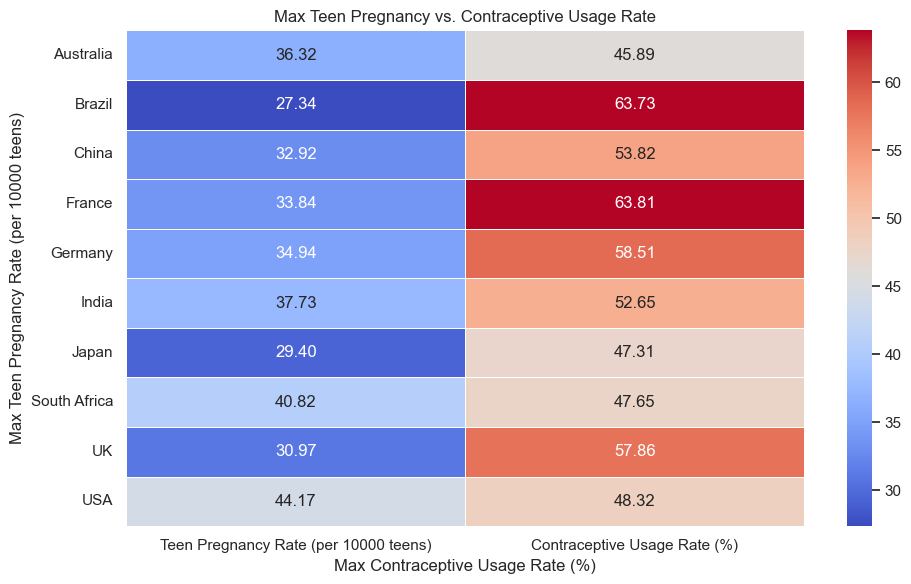

In [5]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
df_CUR = df.groupby('Country')[['Teen Pregnancy Rate (per 10000 teens)','Contraceptive Usage Rate (%)']].median()
sns.heatmap(df_CUR, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f",)
plt.xlabel("Max Contraceptive Usage Rate (%)")
plt.ylabel("Max Teen Pregnancy Rate (per 10000 teens)")
plt.title("Max Teen Pregnancy vs. Contraceptive Usage Rate")
plt.tight_layout()
plt.show()

Analysis and Insights:
The heatmap highlights the relationship between teen pregnancy rates and contraceptive usage rates across countries.

Countries like Brazil, France, and Germany show higher contraceptive usage (around 60%) but still report moderate teen pregnancy rates (below 35 per 10,000 teens), suggesting that other factors like education and healthcare access play important roles.

South Africa has a high teen pregnancy rate (40.82), despite a moderate contraceptive usage rate (47.65%), potentially pointing to issues like access, cultural barriers, or ineffective education.

The USA shows a relatively high pregnancy rate (44.17), which could be influenced by disparities in sex education, healthcare access, and socio-cultural factors, even though contraceptive usage is around 48%.

Japan has a moderate contraceptive usage rate (47.31%) but a significantly lower pregnancy rate (29.40), indicating the importance of strong sex education and cultural attitudes towards teen pregnancy.

Key Insight:
The heatmap suggests that while contraceptive usage is a key factor in reducing teen pregnancies, sex education, cultural norms, and healthcare access are also crucial determinants.

In [7]:
df_CUR = df.groupby('Country')[['Teen Pregnancy Rate (per 10000 teens)','Contraceptive Usage Rate (%)']].median()
df_CUR

,Teen Pregnancy Rate (per 10000 teens),Contraceptive Usage Rate (%)
Country,,
Australia,36.32,45.89
Brazil,27.34,63.73
China,32.92,53.82
France,33.84,63.81
Germany,34.94,58.51
India,37.73,52.65
Japan,29.40,47.31
South Africa,40.82,47.65
UK,30.97,57.86
